<center><h1>Data Transformation</h1></center>

> Data transformation is the process of converting raw data into a format or structure that would be more suitable for model building

### Why need data transformation?
- the algorithm is more likely to be biased when the data distribution is skewed
- transforming data into the same scale allows the algorithm to compare the relative relationship between data points better

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype


In [3]:
df = pd.read_csv("./marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


### Feature Engineering

1. Transform Year_Birth into Age

In [4]:
from datetime import date
df['Age'] = date.today().year - df['Year_Birth']



2. Transform Dt_Customer into Enrollment_Length

In [5]:
df['Year'] = pd.DatetimeIndex(df['Dt_Customer']). year
df['Enrollment_Length'] = date.today().year - df['Year']

3. Transform Currency format into numbers

In [6]:
df['Income$'] = df[' Income '].str.replace(',', '').str.replace('$', '').str.replace('.', '').fillna(0).astype(int)
df['Income_M$'] = df['Income$'].apply(lambda x: round(x/1000000, 2))

In [7]:
df[['Income_M$', 'Income$']]

,Income_M$,Income$
0,8.48,8483500
1,5.71,5709100
2,6.73,6726700
3,3.25,3247400
4,2.15,2147400
...,...,...
2235,6.65,6647600
2236,3.11,3105600
2237,4.63,4631000
2238,6.58,6581900


### EDA

In [8]:
numeric_vars =  ['Age', 'Enrollment_Length', 'Income_M$', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

/home/tanya/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/tanya/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/tanya/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/tanya/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDepreca

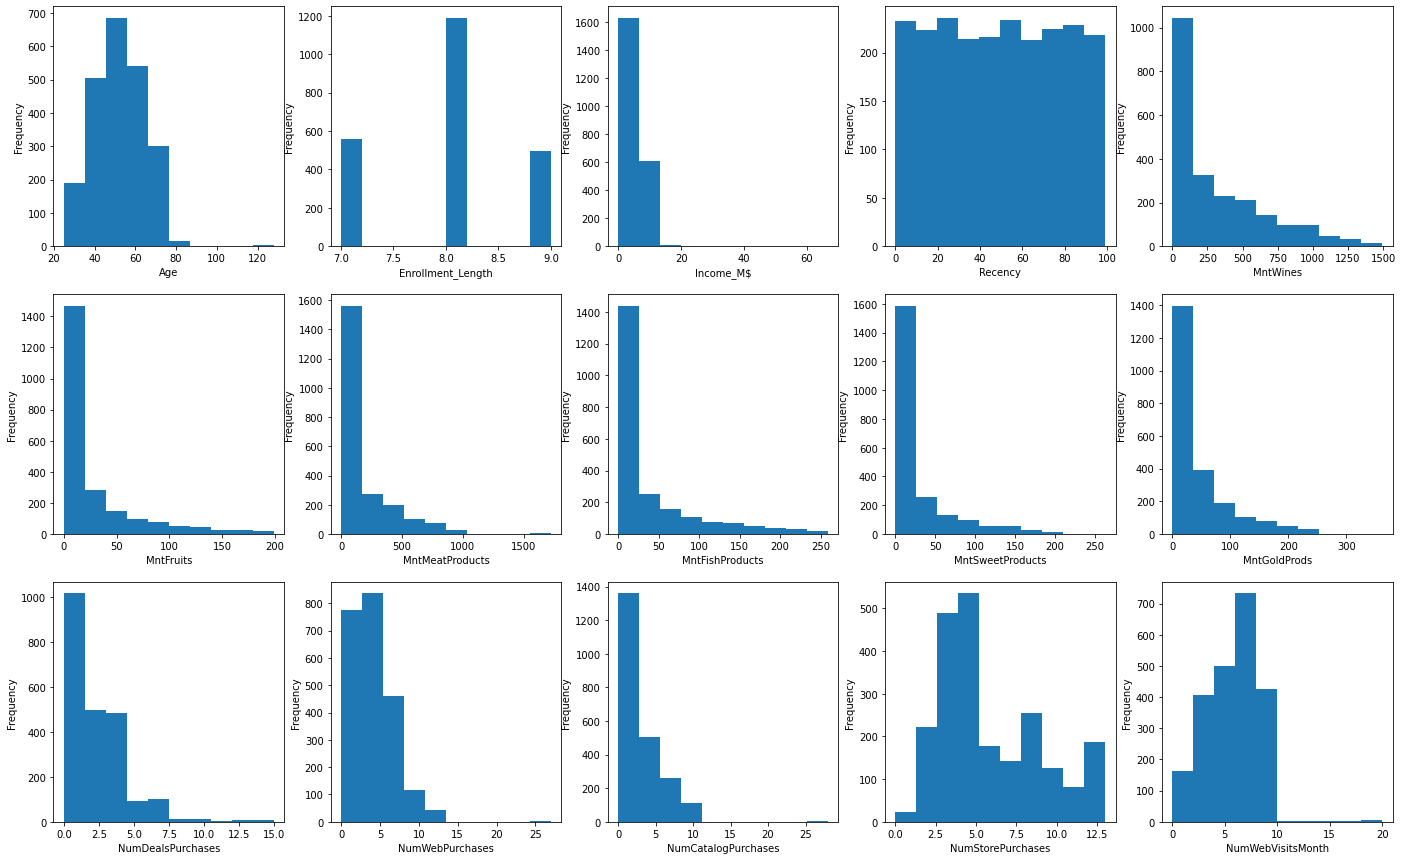

In [9]:
# create histograms for each numeric variable
fig = plt.figure(figsize=(24, 15))
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(var)
    df[var].plot(kind = 'hist')

## Log Transformation - Right Skewed Data

/home/tanya/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/tanya/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/tanya/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/tanya/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDepreca

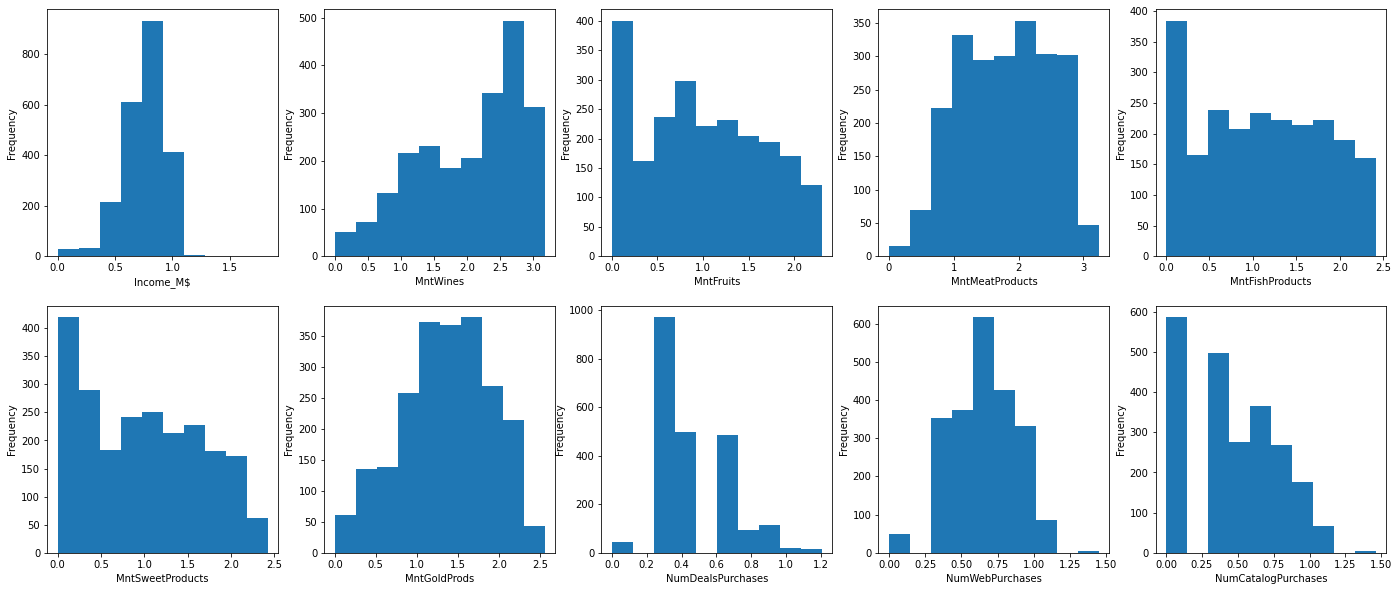

In [13]:
## log transformation - power law distribution ##
log_var = ['Income_M$', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
           'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
           'NumCatalogPurchases']

fig = plt.figure(figsize = (24,10))

for j in range(len(log_var)):
    var = log_var[j]
    transformed = "log_" + var
    df[transformed] = np.log10(df[var]+1)

    sub = fig.add_subplot(2, 5, j + 1)
    sub.set_xlabel(var)
    df[transformed].plot(kind = 'hist')

## Clipping Method

count    2240.000000
mean       52.194196
std        11.984069
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64
count    2240.000000
mean       52.089286
std        11.228158
min        33.000000
25%        44.000000
50%        51.000000
75%        62.000000
max        71.000000
Name: clipped_Age, dtype: float64
count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64
count    2240.000000
mean        5.244196
std         2.235711
min         1.000000
25%         3.000000
50%         6.000000
75%         7.000000
max         8.000000
Name: clipped_NumWebVisitsMonth, dtype: float64


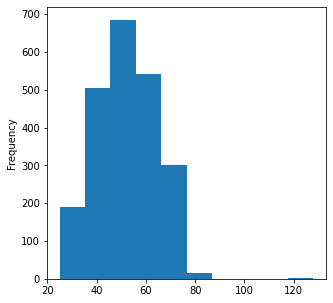

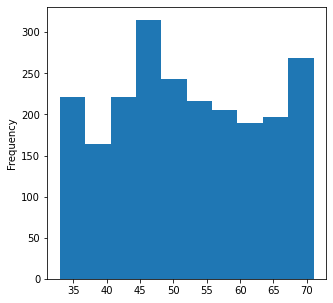

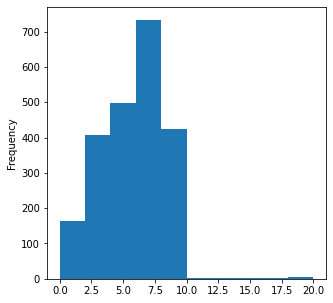

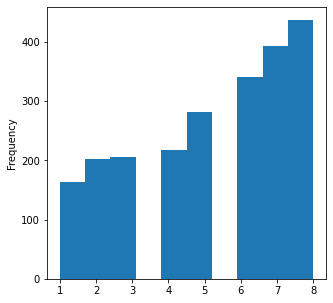

In [14]:
## clipping methods - handle outliers ##

clip_var = ['Age', 'NumWebVisitsMonth']

for i in clip_var:
    transformed = 'clipped_'+ i

    # upper limit - .95 quantile
    upper_limit = df[i].quantile(0.95)

    # lower limit - .05 quantile
    lower_limit = df[i].quantile(0.05)

    df[transformed] = df[i].clip(lower_limit, upper_limit, axis = 0)
    
    print(df[i].describe())
    print(df[transformed].describe())
    
    plt.figure(figsize = (5,5))
    df[i].plot(kind = 'hist')
    
    plt.figure(figsize = (5,5))
    df[transformed].plot(kind = 'hist')
